In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

# 2. Load cleaned dataset
data_path = '../data/processed/diabetes_combined.csv'
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,126.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,126.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,126.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [2]:
# 3. Split dataset into features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (2214, 8)
Test shape: (554, 8)


In [3]:
# 5. Model training with Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid = GridSearchCV(gb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       363
           1       0.99      0.98      0.98       191

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



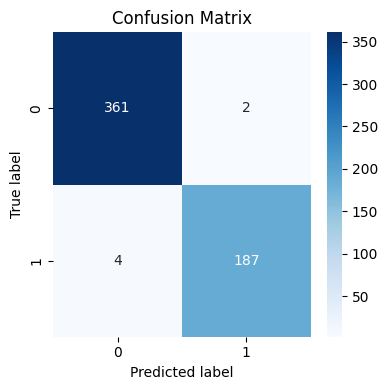

In [7]:
# 6. Model Evaluation
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.savefig('../plots/confusion_matrix.png')  # Save plot
plt.show()

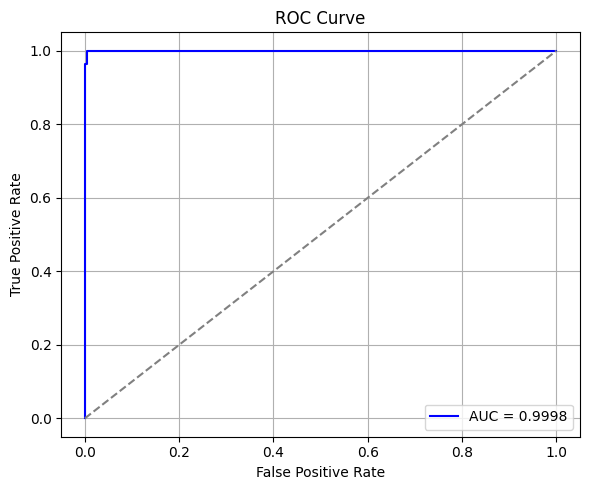

In [8]:
# ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('../plots/roc_curve.png')  # Save plot
plt.show()

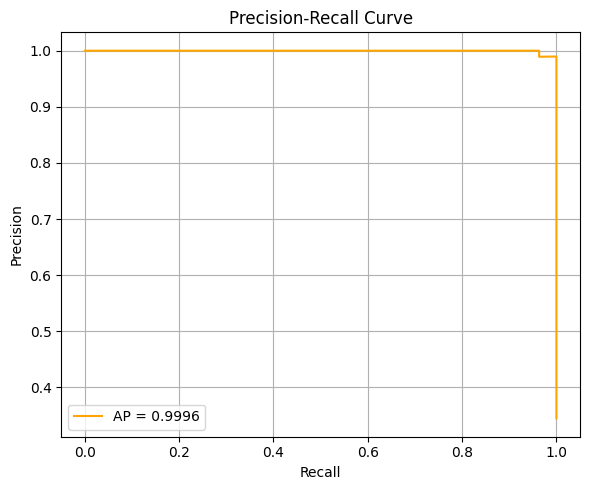

In [9]:
# Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"AP = {ap:.4f}", color='orange')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('../plots/pr_curve.png')  # Save plot
plt.show()

In [10]:
# 7. Save model
model_path = '../models/diabetes_model_combined.pkl'
joblib.dump(best_model, model_path)
print(f"✅ Model saved to: {model_path}")

✅ Model saved to: ../models/diabetes_model_combined.pkl
